# Regressão Linear - Grupo de DS Avançado


#### Autor: Rafael Barbosa - [LinkedIn](https://www.linkedin.com/in/rafael-barbosa0/) - [Github](https://github.com/barbosarafael)

#### **Nota**
Esse tutorial/post/notebook/o_que_você_quiser_chamar possui um viés acadêmico, então tem coisas que provavelmente passarei despercebido em relação aos conceitos. Um dica, se não entendeu algo, mande mensagem ou dê a famosa googlada.

<p align="center">
  <img alt="decision_tree" src="https://images.unsplash.com/photo-1494178270175-e96de2971df9?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=672&q=80" alt="drawing" width="500" height="400"/>
  <br>
    <em> <span>Photo by <a href="https://unsplash.com/@fossy?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Fab Lentz</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span> </em>
</p>

## 1. Introdução

---

- A Regressão Linear é um método estatístico, também utilizado em aprendizado de máquina, para fornecer a relação linear entre uma ou mais variáveis X (chamadas de **independente(s), explicativa(s), feature(s), etc**) com uma outra variável fixa Y (esta chamada de **dependente, resposta, target, etc**);

- A partir desse momento chamarei as variáveis desse jeito:

  - **X**: Explicativa(s)
  - **Y**: Resposta

- Quando temos somente uma variável X **explicativa**, chamamos de Regressão Linear Simples. Por exemplo:

  - **X**: Peso da pessoa; **Y**: Altura da pessoa;
  - **X**: Tempo de uso; **Y**: Preço do carro.

- Já quando possui duas ou mais variáveis **explicativas**, então chamamos de Regressão Linear Múltipla. Por exemplo:

  - **X**: Peso da pessoa, tamanho da cintura e largura do braço; **Y**: Altura da pessoa;
  - **X**: Tempo de uso e tamanho do capô; **Y**: Preço do carro.

- Podemos utilizar a Regressão Linear com duas finalidades:

  - Modelagem: Onde queremos verificar o quanto cada variável explicativa impacta na nossa variável resposta, por meio do coeficiente resultante;

  - Previsão: Quando queremos prever novos dados a partir do nosso modelo já criado.

- Supondo uma variável X explicativa qualquer e outra Y resposta, podemos verificar, empiricamente, a relação linear entre elas por meio de um gráfico de dispersão (scatterplot);

- Se quisermos verificar estatisticamente e imparcialmente podemos fazer aplicar uma técnica chamada de correlação linear de Pearson.

# 2. Correlação

---

- Mede o nível de associação linear entre duas variáveis quantitativas X e Y;

- Esta associação pode apresentar as seguintes particularidades:

  - Ser **positiva**, isto é, os valores das variáveis X e Y são diretamente proporcionais. Exemplo hipotético, quanto maior o peso **maior** a altura;

  - Ser **negativa**, isto é, os valores das variáveis X e Y são inversamente proporcionais. Exemplo hipotético, quanto maior o peso **menor** a altura;

  - Não possuir correlação.

- Como mencionado acima, a correlação pode ser medida intuitivamente ou "cientificamente" correta;

## 2.1. Scatterplot (método informal)

<p align="center">
  <img alt="decision_tree" src="https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png" alt="drawing" width="600" height="300"/>
  <br>
    <em> <b> Finjam que não existem os números e somente observem o comportamento dos pontos e a direção da seta. Retirado de: </b> https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/ </em>
</p>

- Os pontos gerados para a construção do *scatterplot* são gerados a partir de cada observação (linha) que corresponde a um ponto no $ R^2 $ com as coordenadas $ (x_i, y_i), i = 1, 2, ..., n $;

- Nele podemos verificar informalmente mas não podemos provar "cientificamente" (aquele famoso numerozinho) que a variável X possui uma relação linear com a Y;

- Por isso temos o coeficiente de correlação de Pearson.

## 2.2. Coeficiente de correlação de Pearson (método formal)

<p align="center">
  <img alt="decision_tree" src="https://3.bp.blogspot.com/-CVoTLNP0_lo/WJnRWLD_sKI/AAAAAAAAAI8/t5OxUzBAyfYHUWpxT4oOP6qvkZXVjBpFACLcB/s320/1j58h9.jpg" alt="drawing" width="400" height="300"/>
  <br>
    <em> <b> Memes everywhere. Retirado de: </b> https://adampegler.blogspot.com/2017/02/bonetts-2008-method-for-confidence.html </em>
</p>

- Calculado a partir da fórmula abaixo:

$$ R_{xy} = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i = 1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i = 1}^{n}(y_i - \bar{y})^2}} $$

- Ele é o responsável por soltar o "numerozinho" que usaremos para verificar a relação linear entre a variável explicativa X e a resposta Y;

- Este coeficiente $ R_{xy} $ varia de -1 a 1 e pode ter algumas das seguintes interpretações:

  - Se $ R_{xy} $ = -1, então a relação linear entre as variáveis X e Y é **positiva** e perfeita;
  - Se $ R_{xy} $ = 0, então não existe relação linear entre as variáveis X e Y;
  - Se $ R_{xy} $ = 1, então a relação linear entre as variáveis X e Y é **negativa** e perfeita.

## 2.3. Exemplo no Python

- Inicialmente vamos utilizar duas variáveis do dataset iris para verificar como interpretar esta correlação

### 2.3.1 Scatterplot

- Por meio do scatterplot podemos verificar que há uma tendência decrescete entre a relação da **Sepal Width** com a **Petal Length**, indicando que elas possuem uma correlação linear negativa;

- Já entre as variáveis **Petal Length** e **Sepal Length**, temos indicadores de uma relação diretamente proporcional entre elas, dado que a tendência da reta é crescente;

- Novamente, essa ideia do scatterplot é justamente ter um indicador de correlação. Não conseguimos comprovar cientificamente a partir dela.

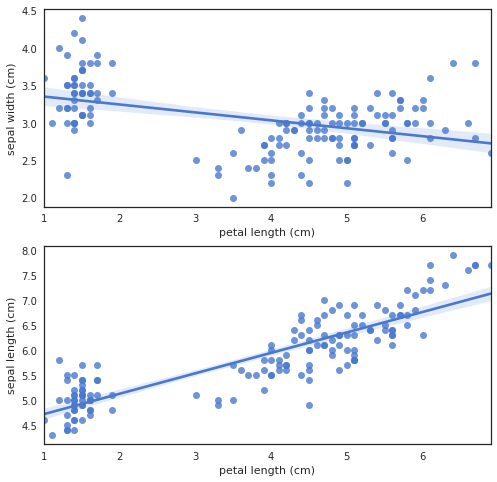

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from scipy import stats

#-----------------------------------------

pd.set_option('display.max_columns', None)
plt.style.use("seaborn-white")
%matplotlib inline


#-----------------------------------------

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)

f, axes = plt.subplots(2, 1, figsize = (8, 8))

sns.regplot(x = df["petal length (cm)"], y = df["sepal width (cm)"], ax = axes[0])
sns.regplot(x = df["petal length (cm)"], y = df["sepal length (cm)"], ax = axes[1])

plt.show()

### 2.3.2. Correlação Linear de Pearson

- O resultado abaixo nos mostra a matriz de correlação entre as mesmas variáveis do gráfico acima;

- Os resultados a serem observados são aqueles que correspondem a nossa primeira variável na linha (ou coluna) e segunda variável na coluna (ou linha).Nela podemos comprovar que:

  - A relação linear entre a **Petal Length** e **Sepal Length** é realmente negativa;

  - A realação linear entre a **Petal Length** e **Sepal Width** é realmente positiva;

- Também podemos observar que a correlação linear entre as variáveis iguais entre si, isto é, **Sepal Length** na linha e **Sepal Length** na coluna, sempre vai ter a correlação perfeita com o valor de 1 para a esta.

In [ ]:
df[["petal length (cm)", "sepal width (cm)", "sepal length (cm)"]].corr()

,petal length (cm),sepal width (cm),sepal length (cm)
petal length (cm),1.000000,-0.42844,0.871754
sepal width (cm),-0.428440,1.00000,-0.117570
sepal length (cm),0.871754,-0.11757,1.000000


# 3. Regressão

- Como mencionado acima, a regressão busca entender a relação entre a(s) variável(is) explicativas X com a resposta Y;

- A regressão possui a seguinte forma de cálculo:

$$ Y_i = \beta_0 + \sum^{n}_{i = 1}\beta_i X_i + \epsilon_i, \quad i = 1, 2, \dots, n $$

- onde:

  - $ Y_i $ representa a variável resposta que queremos prever, dada os valores da equação;

  - $ \beta_0 $ representa o coeficiente que devemos estimar que representa o intercepto da reta com o eixo Y do gráfico;

  - $ \beta_i $ se este coeficiente tiver $ i = 1 $, então a regressão é denominada de Simples, já se este for $ i > 1 $, então chamamos de regressão Múltipla. Ele é chamado de coeficiente angular, pois ele quem determina a inclinação da reta e, também, representa o quanto varia a média de Y para um aumento de uma unidade na variável **X**;

  - $ X_i $ mesmo esquema com o $ i $ do $ \beta_i $ sobre a ser Simples ou Múltipla, já que ela também faz parte do somatório. Representam as nossas variáveis explicativas **X** no modelo. Cada variável explicativa **X** terá um coeficiente $ \beta $ associado a esta;

  - $ \epsilon $ é o erro associado a diferença entre o valor previsto e o observado.

- O método de estimação para os coeficientes $ \hat{\beta_0} $ e $ \hat{\beta_i} $ mais conhecido é o Método dos Mínimos Quadrados. Na qual possui o objetivo de achar os coeficientes para que estes minimizem a Soma do Quadrado dos Erros (SQE). Podemos começar a demonstração do seguinte método:

$$ \epsilon =  Y_i - \beta_0 + \sum^{n}_{i = 1}\beta_i X_i $$


- O restante da demonstração você pode verificar no [material de aula da professora Lígia Henriques-Rodrigues](https://www.ime.usp.br/~fmachado/MAE229/AULA10.pdf), no [material do professor Luiz Alexandre Peternelli](http://www.dpi.ufv.br/~peternelli/inf162.www.16032004/materiais/CAPITULO9.pdf) e neste [material do professor Marcone Jamilson](http://www.decom.ufop.br/prof/marcone/Disciplinas/MetodosNumericoseEstatisticos/QuadradosMinimos.pdf).


## 3.1. Premissas para o uso

- Entretanto, nem tudo é flores. Esse método de estimação nos obriga (geralmente, né) que os nossos dados estejam totalmente corretos e obedeçam as suposições para poder aplicá-la corretamente;

- Quando eu menciono corretamente é por que nem sempre todo mundo verifica elas, existem casos e casos;

- Segundo este [artigo](https://periodicos.ufpe.br/revistas/politicahoje/article/download/3808/31622), autora menciona que para a regressão com o método de mínimos quadrados (OLS), existem 10 pressupostos que devem ser aceitos para que o modelo de Regressão seja consistente.

### 3.1.1. Relação entre a(s) variável(is) explicativa(s) com a variável resposta

- É esperado que essa relação possa ser representada por uma função linear, isto é, nos parâmetros/coeficientes;

- Se essa relação se distanciar de uma função linear, a diferença entre os parâmetros estimados e os verdadeiros valores destes parâmetros não serão próximos e o OLS não irá produzir o melhor estimador linear não-viesado;

- O ideal é justamente que esses parâmetros estimados sejam os mais próximos dos verdadeiros possíveis;

- Uma das formas de contornar esse problema é fazer transformações nas variáveis explicativas X, como raiz quadrado, log, potências, etc;


### 3.1.2. Variáveis medidas adequadamente

- Assim como nas demais áreas, se uma variável é mensurada incorretamente, qualquer interpretação ou inferência a partir dela não serão confiáveis;

- No modelo de regressão não é diferente, estas variáveis mensuradas incorretamente irão produzir estimativas incorretas para nossos parâmetros $ \beta $s, fazendo com que as interpretações para estes sejam totalmente erradas;

### 3.1.3. O erro possui média 0

- Significa dizer que os erro (fatores que não estão incluídos no modelo) não afetam o valor médio de Y;

- Por estarmos considerando que a média irá ser 0, então os valores das estimativas diferem igualmente tanto para valores positivos, quanto para negativos e eles acabam por se anular;

- Violar essa premissa afeta a estimativa do intercepto.

### 3.1.4. Homocedasticidade do erro

<p align="center">
  <img alt="decision_tree" src="https://methods.sagepub.com/images/virtual/heteroscedasticity-in-canada-fuel-2015-stata/10.4135_9781526472601-fig1.jpg" alt="drawing" width="600" height="300"/>
  <br>
    <em> <b> Exemplo de homocedasticidade e heterocedasticidade. Retirado de: </b> https://methods.sagepub.com/dataset/heteroscedasticity-in-canada-fuel-2015-stata </em>
</p>



- Nesse caso, assumimos que os valores dos **resíduos** (diferença entre o valor observado e o estimado da nossa variável resposta Y) devem ser distribuídos uniformemente, isto é, $ E(e_i^2) = \sigma^2 $;

- A violação desse pressuposto afeta as estimativas do método OLS, na qual prejudica a confiabilidade dos testes de significância e intervalos de confiança;

- Para contornar esse problema, podemos adicionar aumentar o número de observações, se possível, ou utilizar as transformações nas variáveis novamente;

- Pode-se também verificar esse problema através de um teste estatístico formal. Um deles é o de Levene.

### 3.1.5. Ausência de autocorrelação nos erros

- Quando os erros são ordenados, não poderá haver nenhuma relação entre eles;

- Um pouco mais formal: é uma correlação existente entre uma observação de erro *i* qualquer com sua anterior *i - 1*, logo, $ E(e_i, e_j) = 0 $;

- Um método de verificar essa premissa é a partir do teste de Durbin-Watson.

### 3.1.6. A variável resposta não deve ser correlacionada com o erro (*)

### 3.1.7. Seleção de variáveis úteis ou não

- Aqui entra, inicialmente, o príncipio da parcimônia. Se a sua métrica muda pouco quando você adiciona muitas variáveis, então o mais correto seria preservar a complexidade do modelo e deixar ele com o menor número possíveis de variáveis, dado sua métrica;

- Todas as variáveis importantes **devem ser** incluídas no modelo, assim como as variáveis não importantes **não devem** ser incluídas;

- As variáveis que não são importantes no modelo irão enviesar os parâmetros do modelo, causando problemas no erro padrão das estimativas.

### 3.1.8. Multicolineariedade

- Esse problema é causado quando há uma forte correlação entre as variáveis explicativas **X**;

- Alguns autores mencionam esse problema quando a correlação linear de Pearson é maior que 0.9 ou menor que -0.9 $ (\rho \geq 0.9 \text{ ou } \rho \leq -0.9) $;

- No artigo a autora menciona que, apesar da multicolonieariedade, o método OLS ainda é o melhor (BLUE) estimador linear não-viesado;

- O problema se dá no aumento da variância na estimação dos parâmetros, prejudicando a parte de modelagem, isto é, o quanto cada variável explicativa impacta na variável resposta;

- Entretanto, quando o problema é de predição/previsão a multicolineariedade não afeta tanto o modelo;

- Outro método de identificação para a multicolineariedade é o VIF (Variance Inflaction Factor), quanto maior, pior.

### 3.1.9. O erro possui distribuição normal

- Com média $ \mu = 0 $ e variância $ \sigma^2 $;

- Para que os coeficientes estimados, $ \beta $s e $ \sigma $ sejam não-viesados e eficientes, a distribuição do erro deve ser normal ou gaussiana;

- Pode ser verificada a partir dos testes formais de normalidade, como Shapiro-Wilk, Anderson-Darling, etc.

### 3.1.10. Proporção entre o número de observação e de variáveis

- Essa afirmação envolve a questão de inversão de matrizes;

- E também é desejável que as amostras sejam grandes o suficiente, até mesmo para que possamos entrar no Teorema Central do Limite para realmente confirmar que aquelas variáveis convergem a uma distribuição normal,

# 4. Exemplo prático da Regressão Linear Simples

- O objetivo é seguir o [tutorial](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1) dos pressupostos da regressão linear e aplicar para estes [dados](https://www.kaggle.com/smid80/weatherww2);

- Apesar de termos citados 10 pressupostos, o [tutorial](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1) cita 5:

    1. Linear Relationship between the features and target
    
    2. Little or no Multicollinearity between the features
    
    3. Homoscedasticity Assumption
    
    4. Normal distribution of error terms
    
    5. Little or No autocorrelation in the residuals
    
- Todas estas premissas do tutorial foram citadas entre os 10 pressupostos do artigo mencionado anteriormente.

## 4.1. Análise exploratória básica da básica 

In [ ]:
dados = pd.read_csv(filepath_or_buffer = "data/Summary of Weather.csv", low_memory = False)

dados = dados[["MaxTemp", "MinTemp"]]

dados.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [ ]:
dados.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MaxTemp,119040.0,27.05,8.72,-33.33,25.56,29.44,31.67,50.00
MinTemp,119040.0,17.79,8.33,-38.33,15.00,21.11,23.33,34.44


## 4.2. Verificando as premissas da Regressão Linear

### 4.2.1. Relação linear entre X e Y

- Como mencionado acima, dado que temos somente uma variável explicativa, podemos utilizar o scatterplot ou a correlação de Pearson para verificar. Vamos utilizar ambos;

- Pela Figura abaixo, podemos notar que a relação entre ambas as variáveis é diretamente proporcional, isto é, conforme a MaxTemp aumenta no eixo Y a MinTemp também aumenta no eixo X, indicando uma possível relação linear forte;

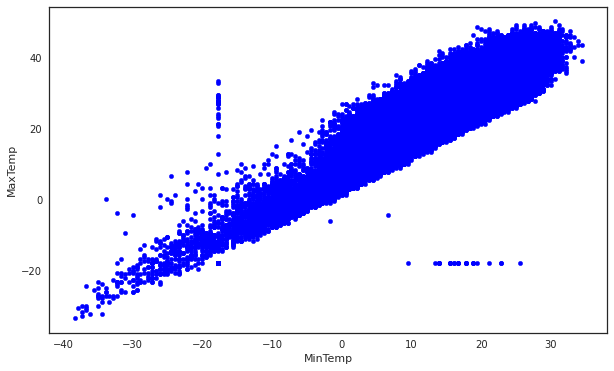

In [ ]:
dados.plot(x = "MinTemp", y = "MaxTemp", kind = "scatter", figsize = (10, 6), c = "blue")

plt.show()

- Esta relação linear é confirmada por meio do teste formal de Pearson, indicando que a relação entre elas é forte e positiva.

In [ ]:
dados.corr()

,MaxTemp,MinTemp
MaxTemp,1.000000,0.878384
MinTemp,0.878384,1.000000


### 4.2.2. Fraca ou nenhuma multicolineariedade entre as variáveis explicativas

- Como temos somente uma variável explicativa, essa premissa simplesmente é válida;

- E não inventem de fazer correlação com ela mesmo só porque o valor resultante será 1.

### 4.2.3. Homocedasticidade

- Os resíduos não possuem uma distribuição aleatória na Figura abaixo;

- Podemos então dizer que nosso modelo possui homocedasticidade, isto é, a variância do erro não é constante.

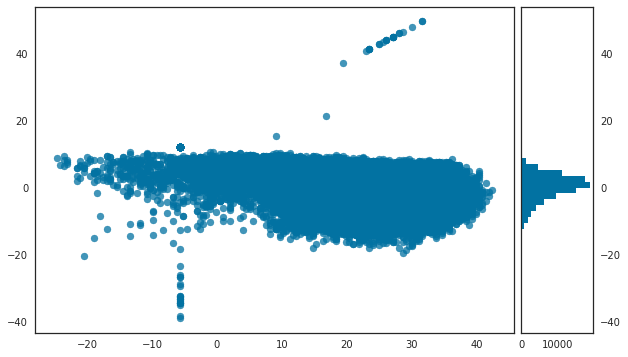

In [ ]:
x = dados["MinTemp"].values.reshape(-1, 1)
y = dados["MaxTemp"].values.reshape(-1, 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 0)

reg_lin = LinearRegression()

plt.figure(figsize = [10, 6])

visualizer = ResidualsPlot(model = reg_lin)
visualizer.fit(x_treino, y_treino)

plt.show()

### 4.2.4. Os resíduos possuem distribuição normal

- O método da Figura abaixo com o qqplot é um dos métodos de indicação de normalidade ou não nos dados, nesse caso, dos resíduos;

- Como os pontos não se encontram juntos a reta, dado que no final ela se distancia totalmente, então não temos um comportamento de distribuição normal para os resíduos;

- Podemos confirmar pelo teste de normalidade de Shapiro-Wilk.

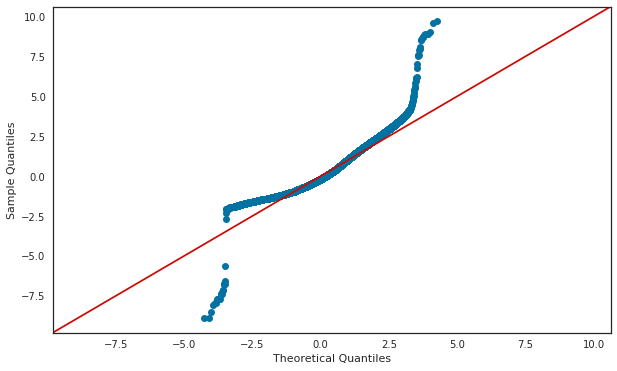

In [ ]:
reg_lin1 = sm.OLS(y_treino, x_treino).fit()

residuos = reg_lin1.resid

fig, ax = plt.subplots(figsize = (10, 6))

sm.qqplot(residuos, fit = True, line = "45", ax = ax)

plt.show()

In [ ]:
# Copiado discaradamente de: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

est, p = stats.shapiro(residuos)

alpha = 0.05

if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Sample does not look Gaussian (reject H0)


/home/rafael/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 4.2.5. Autocorrelação entre os resíduos

- Para a estatística de Durbin-Watson temos o valor de, aproximadamente, 1.8052;

- Segundo o [tutorial](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1) quando este valor se aproxima de 2, indica que os resíduos não estão autocorrelacionados.

In [ ]:
est_dw = round(statsmodels.stats.stattools.durbin_watson(residuos), 4)

print(f"A estatística de Durbin-Watson é de: {est_dw}")

A estatística de Durbin-Watson é de: 1.8052


In [ ]:
print(reg_lin1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.943e+06
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:17:45   Log-Likelihood:                     -3.0799e+05
No. Observations:               95232   AIC:                                  6.160e+05
Df Residuals:                   95231   BIC:                                  6.160e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 4.3. Previsão para os dados de teste

- Verificando as Figuras abaixo, nosso modelo é aceitável para a parte de previsão, já que os valores previstos se aproximam dos valores que realmente aconteceram;

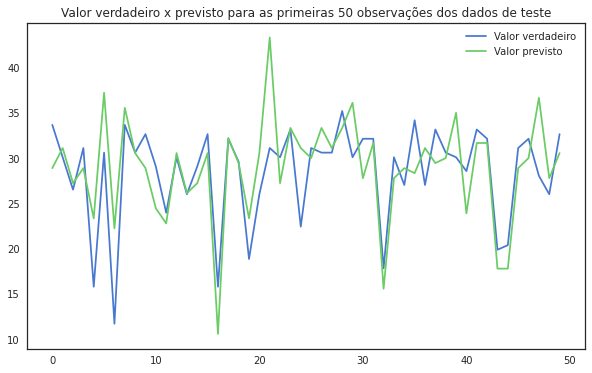

In [ ]:
reg_lin.fit(x_treino, y_treino)

y_pred = reg_lin.predict(x_teste)

dados_comp = pd.DataFrame({"Valor verdadeiro": y_pred.reshape(-1)[:50],
              "Valor previsto": y_teste.reshape(-1)[:50]})

dados_comp.plot(kind = "line", figsize = (10, 6))

plt.title("Valor verdadeiro x previsto para as primeiras 50 observações dos dados de teste")
plt.show()

# 5. Exemplo prático da Regressão Linear Múltipla

- Ainda seguindo o [tutorial](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f), desta vez a segunda parte e ainda obedecendo a questão dos pressupostos;

- Nosso objetivo neste segundo exemplo é prever a **qualidade do vinho vermelho** dado suas características;

- Novamente, todas as modificações no banco de dados são acompanhando as mesmas do autor no tutorial.

## 5.1. Análise Exploratória básica da básica (1)

In [ ]:
dados1 = pd.read_csv(filepath_or_buffer = "data/winequality-red.csv")

dados1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dados1.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1599.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1599.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1599.0,16.0,10.0,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,1599.0,46.0,33.0,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1599.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1599.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


## 5.2. Verificando as premissas da Regressão Linear


### 5.2.1. Relação linear entre X e Y


<p align="center">
  <img alt="decision_tree" src="https://i.kym-cdn.com/entries/icons/original/000/030/710/dd0.png" alt="drawing" width="600" height="300"/>
  <br>
    <em> <b> É... </em> </b>
</p>


- Então, a relação linear aqui não está nenhum pouco ideal, diferente da que vimos no primeiro exemplo;
        
- Em nenhuma variável, diga-se de passagem;
        
- O comportamento da variável resposta (qualidade) não nos dá essa liberdade de fazer uma afirmação concreta de que realmente há uma relação linear;

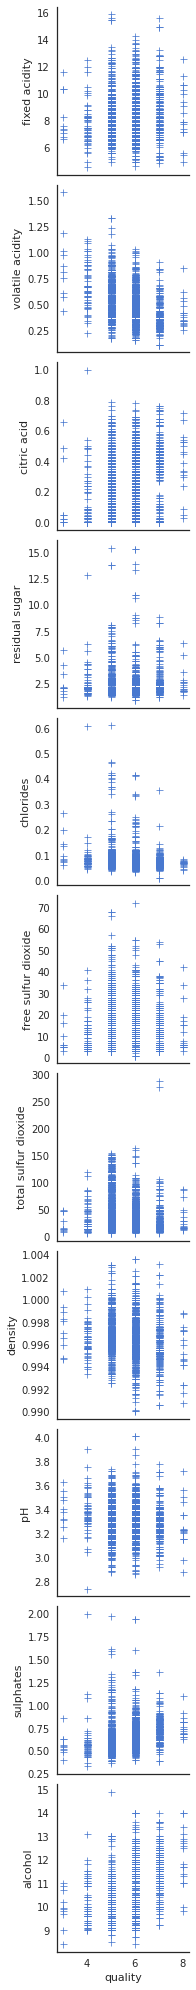

In [ ]:
sns.pairplot(dados1, y_vars = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                             "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"], 
             x_vars = ["quality"], markers = "+")

plt.show()

### 5.2.2. Fraca ou nenhuma multicolineariedade entre as variáveis explicativas

- Quando aplicamos a correlação linear de Pearson até que temos algumas variáveis que indicam relação positiva ou negativa;

- Mas nenhuma apresenta forte correlação linear, acima de 0.9 para indicar multicolineariedade;

- Logo, nenhuma das variáveis será excluída da análise.

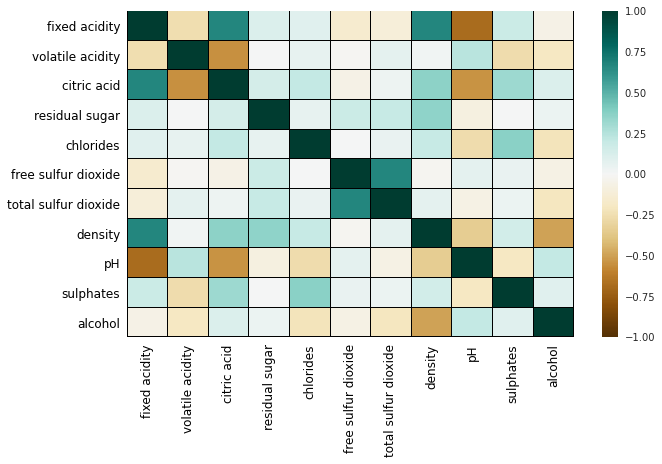

In [ ]:
corr_var = dados1.drop("quality", axis = 1).corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

### 5.2.3. Homocedasticidade

- Podemos observar que os resíduos possuem um comportamento padrão, indicando que a variância é não constante e que estes resíduos são homocedasticos; 

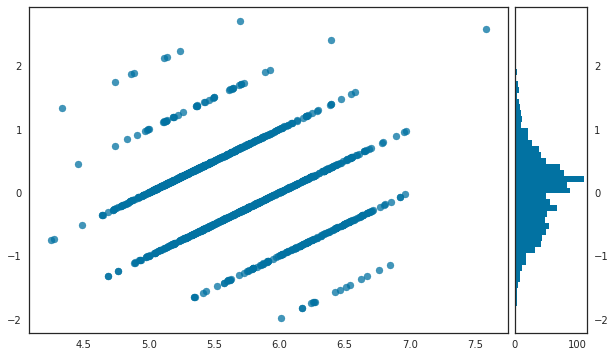

In [ ]:
# x = dados["MinTemp"].values.reshape(-1, 1)
# y = dados["MaxTemp"].values.reshape(-1, 1)

x = dados1.drop("quality", axis = 1)
y = dados1["quality"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 0)

reg_lin = LinearRegression()

plt.figure(figsize = [10, 6])

visualizer = ResidualsPlot(model = reg_lin)
visualizer.fit(x_treino, y_treino)

plt.show()

### 5.2.4. Os resíduos possuem distribuição normal

- Novamente, a indicação do qqplot sobre normalidade é se os pontos em azul estão próximos a linha em vermelho de 45º;

- Nesse caso, ela melhor se aproxima, quando comparamos com o exemplo anterior;

- Então, informalmente, temos uma indicação de que nossos resíduos podem ter distribuição normal.

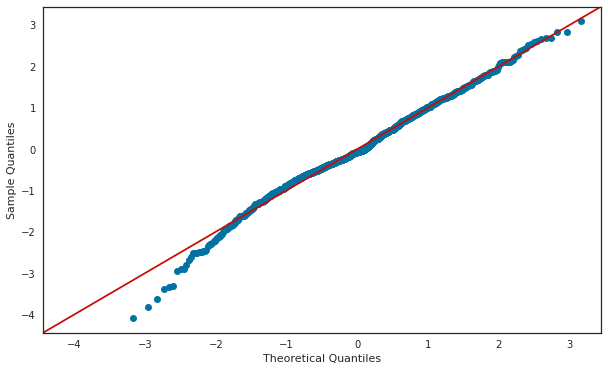

In [ ]:
reg_lin1 = sm.OLS(y_treino, x_treino).fit()

residuos = reg_lin1.resid

fig, ax = plt.subplots(figsize = (10, 6))

sm.qqplot(residuos, fit = True, line = "45", ax = ax)

plt.show()

- Entretanto, quando fazemos o teste de normalidade, nossos resíduos não têm a "cara" de uma distribuição normal.

In [ ]:
est, p = stats.shapiro(residuos)

alpha = 0.05

if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Sample does not look Gaussian (reject H0)


### 5.2.5. Autocorrelação entre os resíduos

- Novamente a estatística de DW nos apresenta um valor próximo a 2;

- Indicando que os resíduos não são autocorrelacionados.

In [ ]:
est_dw = round(statsmodels.stats.stattools.durbin_watson(residuos, axis = 0), 4)

print(f"A estatística de Durbin-Watson é de: {est_dw}")

A estatística de Durbin-Watson é de: 2.0957


In [ ]:
print(reg_lin1.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8683.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:17:56   Log-Likelihood:                         -1269.9
No. Observations:                1279   AIC:                                      2562.
Df Residuals:                    1268   BIC:                                      2619.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### 5.3. Previsão para os dados de teste

- Verificando as Figuras abaixo, nosso modelo é aceitável para a parte de previsão, já que os valores previstos se aproximam dos valores que realmente aconteceram;

- Apesar de algumas peculiaridades, ele até que serve também como um modelo de previsão para este caso.

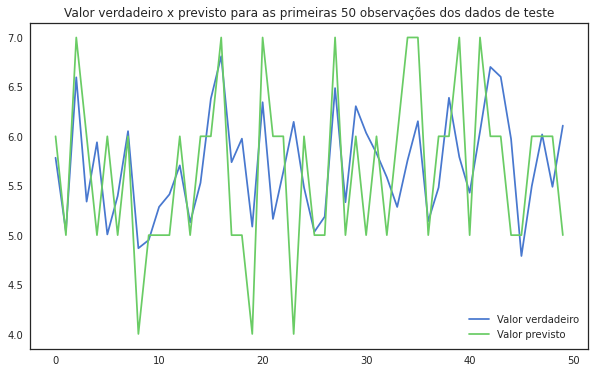

In [ ]:
reg_lin_m = LinearRegression()
reg_lin_m.fit(x_treino, y_treino)

y_pred = reg_lin_m.predict(x_teste)

dados_comp = pd.DataFrame({"Valor verdadeiro": y_pred[:50],
              "Valor previsto": y_teste[:50]}).reset_index().drop("index", axis = 1)

dados_comp.plot(kind = "line", figsize = (10, 6))

plt.title("Valor verdadeiro x previsto para as primeiras 50 observações dos dados de teste")
plt.show()

# Próximo passo é tentar algo a mais

1. Seleção de variáveis
2. VIF, p-valor, etc

# Referências

1. Bussab e Morettin
2. O que Fazer e o que Não Fazer com a Regressão: pressupostos e aplicações do modelo linear de Mínimos Quadrados Ordinários (MQO)
3. https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1
4. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
5. https://www.ime.usp.br/~fmachado/MAE229/AULA10.pdf
6. https://ubibliorum.ubi.pt/bitstream/10400.6/1869/1/Tese%20Sandra%20Rodrigues.pdf
7. https://matheusfacure.github.io/2017/02/15/MQO-formula-analitica/
8. http://www.dpi.ufv.br/~peternelli/inf162.www.16032004/materiais/CAPITULO9.pdf